# Task 6.2: Exploring Relationships

## This Script contains the following..

#### 1. Importing Visualization Libraries and Data
#### 2. Defining Analysis questions to explore
#### 3. Data Wrangling
#### 4. Exploring Relationships
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots



### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This ensures charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Defining path
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6'

In [4]:
# Importing Data
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Gun_violence_Data_cleaned.csv'))

### 2. Defining Analysis Questions to explore

#### Descriptive Analysis
- How has gun violence changed over time ( yearly, monthly, seasonally)?
- What specific regions (states, cities) have higher gun violence rates?
- Are there demographic trends (age, gender) in gun violence?

#### Correlations
- How does ownership rate correlate with gun violence incidents?
- How does stolen/illegal gun rate correlate with gun violence incidents?


### 2. Data Wrangling

In [5]:
# Checking imported Dataframe
df.head(2)

,incident_id,date,state,city_or_county,address,number_killed,number_injured,incident_url,source_url,incident_url_fields_missing,...,number_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,state_house_district,state_senate_district
0,461105,01/01/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,NaN,Julian Sims under investigation: Four Shot and...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male|1, Male|3, Male|4, Female","0, Julian Sims","0, Arrested|1, Injured|2, Injured|3, Injured|4...","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",NaN,NaN
1,460726,01/01/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,NaN,Four Shot; One Killed; Unidentified shooter in...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male","0, Bernard Gillis","0, Killed|1, Injured|2, Injured|3, Injured","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",62.0,35.0


In [6]:
df.shape

(239677, 27)

In [7]:
# Selecting variables relevant to analysis 
df_relevant_var = df[['number_killed', 'number_injured', 'gun_stolen', 'gun_type', 'participant_age', 'participant_gender']]

In [8]:
# Checking new dataframe subset
df_relevant_var. head()

,number_killed,number_injured,gun_stolen,gun_type,participant_age,participant_gender
0,0,4,NaN,NaN,"0, 20","0, Male|1, Male|3, Male|4, Female"
1,1,3,NaN,NaN,"0, 20","0, Male"
2,1,3,"0, Unknown|1, Unknown","0, Unknown|1, Unknown","0, 25|1, 31|2, 33|3, 34|4, 33","0, Male|1, Male|2, Male|3, Male|4, Male"
3,4,0,NaN,NaN,"0, 29|1, 33|2, 56|3, 33","0, Female|1, Male|2, Male|3, Male"
4,2,2,"0, Unknown|1, Unknown","0, Handgun|1, Handgun","0, 18|1, 46|2, 14|3, 47","0, Female|1, Male|2, Male|3, Female"


In [9]:
df_relevant_var.shape

(239677, 6)

### Exploring relationships

#### Correlations

In [10]:
# Creating a correlation matrix using pandas
# Selecting only columns with numerical values in order to avoid errors
numerical_columns = df.select_dtypes(include=['float', 'int64'])
numerical_columns.corr()


,incident_id,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
incident_id,1.000000,0.005052,0.009060,-0.003585,0.019365,-0.017031,-0.029638,-0.002243,-0.007790
number_killed,0.005052,1.000000,-0.125425,0.055545,-0.080078,-0.062149,-0.028200,-0.006015,-0.010650
number_injured,0.009060,-0.125425,1.000000,-0.007636,-0.011379,0.036962,-0.038843,-0.030355,-0.044294
congressional_district,-0.003585,0.055545,-0.007636,1.000000,-0.259488,-0.215606,0.021249,0.228827,0.309116
latitude,0.019365,-0.080078,-0.011379,-0.259488,1.000000,-0.056713,-0.001341,-0.237958,0.028611
longitude,-0.017031,-0.062149,0.036962,-0.215606,-0.056713,1.000000,-0.016107,0.236450,0.113408
number_guns_involved,-0.029638,-0.028200,-0.038843,0.021249,-0.001341,-0.016107,1.000000,-0.003324,0.004247
state_house_district,-0.002243,-0.006015,-0.030355,0.228827,-0.237958,0.236450,-0.003324,1.000000,0.431299
state_senate_district,-0.007790,-0.010650,-0.044294,0.309116,0.028611,0.113408,0.004247,0.431299,1.000000


In [11]:
# Dropping Incident id
numerical_columns = numerical_columns.drop('incident_id', axis=1)

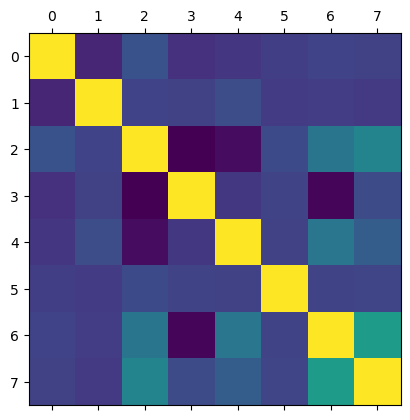

In [12]:
# Creating a correlation heatmap using matplotlib
plt.matshow(numerical_columns.corr())
plt.show()

In [13]:
#saving figure
plt.matshow(numerical_columns.corr())
plt.savefig('corr_output.png')

In [14]:
# Current image directory
cwd = os.getcwd()
cwd

'C:\\Users\\terry\\Documents\\Data Analytics Course\\Achievement 6\\Jupyter Notebooks'

In [15]:
# adding labels, a legend and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # Figure size
plt.matshow(numerical_columns.corr(), fignum=f.number) # type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # adding a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # adding fon size
plt.title('Correlation Matrix', fontsize=14) # adding title


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Creating a correlation heatmap using seaborn

In [16]:
numerical_columns.columns

Index(['number_killed', 'number_injured', 'congressional_district', 'latitude',
       'longitude', 'number_guns_involved', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [20]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The 'annot' argument allows the plot to place the
# place the correlation coefficients onto the heatmap


### Scatterplots:

In [104]:
# Creating a scatterplot for the "Congressional District" and "number_killed" columns in seaborn
sns.lmplot(x = 'congressional_district', y = 'number_killed', data = numerical_columns)

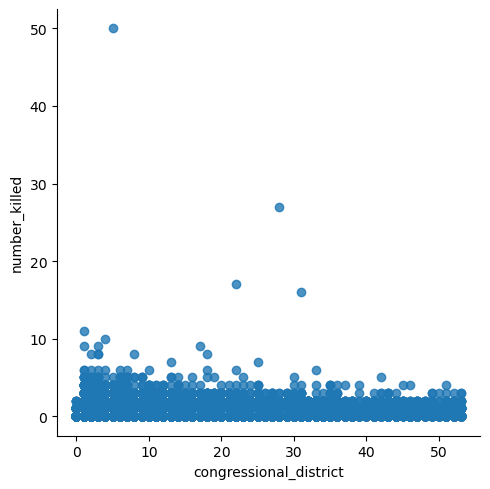

In [105]:
plt.show()